

# 项目：调查电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

针对历年电影数据，我们来分析下什么样的电影是导演喜欢拍摄的?什么样的电影是观众比较喜欢的电影?

In [94]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline


<a id='wrangling'></a>
## 数据整理


### 常规属性

In [95]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
movies = pd.read_csv('data/tmdb-movies/tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


查看基本信息

In [96]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

查看数据基本信息，可以发现该数据有10866行，21列。数据中存在空数据的情况，release_date数据格式不对，应为时间格式

In [97]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

查看空数据，值不等于0表示该字段存在空数据。空数据多为str类型。

In [98]:
movies.duplicated().sum()

1

由以上操作可以看出存在1行重复行


### 数据清理

In [99]:
movies_clear= movies.drop_duplicates(subset='id',keep='first')[['genres','id','vote_average','release_year','revenue_adj','original_title']]
movies_clear.shape

(10865, 6)

去重，并筛选出有用的列

In [100]:
movies_clear.duplicated().sum()

0

检验是否已去重。因为我们暂时不需要于release_date这个属性它，所以不对它进行清理。

In [101]:
movies_clear.isnull().sum()

genres            23
id                 0
vote_average       0
release_year       0
revenue_adj        0
original_title     0
dtype: int64

再次查看新的数据是否有空数据，发现genres还有23个空数据，因此下一步去掉含有这些空值的行

In [102]:
movies_clear.dropna(inplace=True)
movies_clear.isnull().sum()

genres            0
id                0
vote_average      0
release_year      0
revenue_adj       0
original_title    0
dtype: int64

去掉含有空值的行

In [103]:
movies_clear.to_csv('data/tmdb-movies/tmdb-movies-clear.csv')
movies_clear.shape

(10842, 6)

将清理过的数据保存到新的文件中：tmdb-movies-clear.csv

<a id='eda'></a>
## 探索性数据分析


### 导演最喜欢拍的电影类型

In [104]:
movies_clear = movies_clear.drop('genres', axis=1).join(
        movies_clear['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

按‘|’分隔，并整合数据

In [105]:
movies_clear.shape

(26955, 6)

查看行，列数

In [106]:
movies_clear = movies_clear[movies_clear['revenue_adj']>0]
movies_clear.shape

(12664, 6)

过滤掉revenue_adj=0的行，因为数据量够大，排除干扰因素

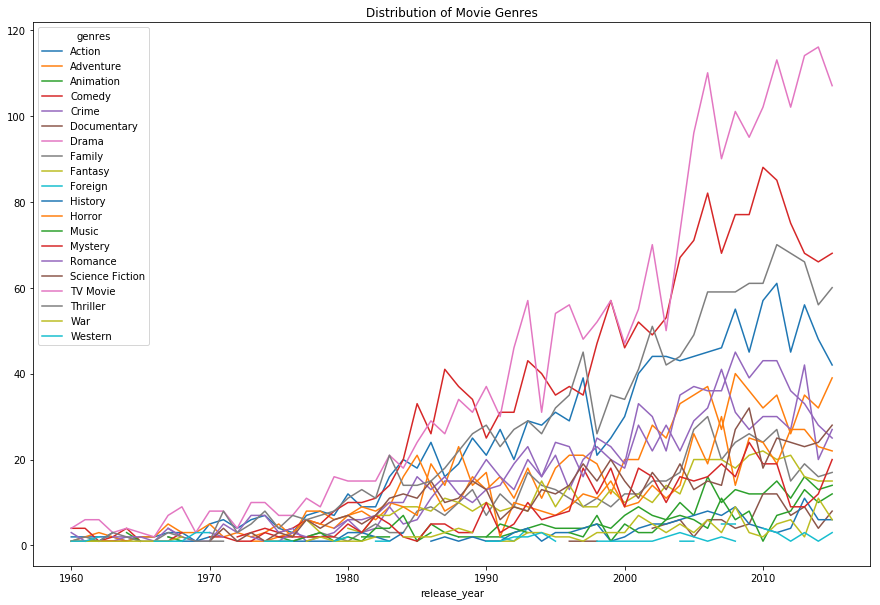

In [107]:
movies_clear.groupby(['genres','release_year'])['genres'].count().unstack('genres').plot(figsize=(15,10), title='Distribution of Movie Genres')

Drama、Comedy和Thriller这三类电影增长速度最快，因此最受导演喜欢。

In [108]:
movies_clear_genres_1 = movies_clear.query('genres == "Drama" or genres == "Comedy" or genres == "Thriller"')

筛选出这三类电影，我们只对这三种感兴趣的电影类型进行可视化，近距离看看他们的发展趋势。

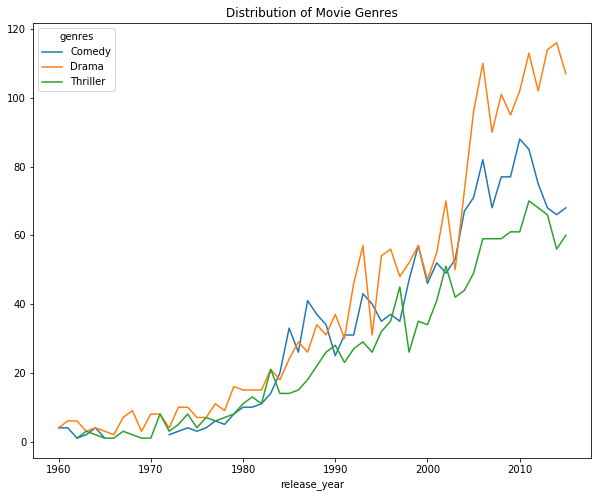

In [109]:
movies_clear_genres_1.groupby(['genres','release_year'])['genres'].count().unstack('genres').plot(figsize=(10,8), title='Distribution of Movie Genres')

由上图可知，这三类电影发展趋势还是比较猛的，基本上每年都有不小的涨幅。

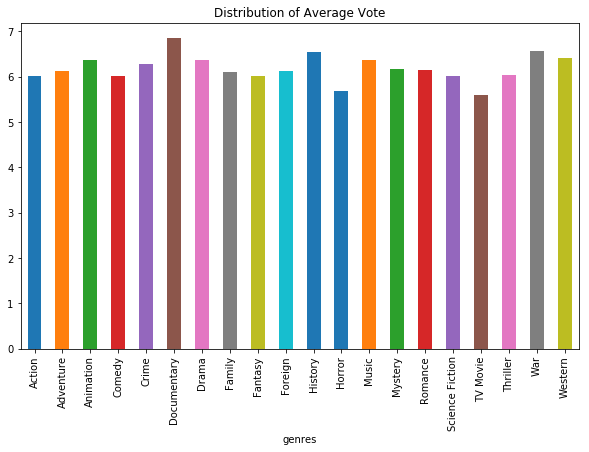

In [110]:
movies_clear.groupby(['genres'])['vote_average'].mean().plot(kind='bar', figsize=(10,6), title='Distribution of Average Vote')

不同类型的电影评分差距不大，基本都在6分左右，这些题材的电影保持平均水平。

### 票房最高的电影类型

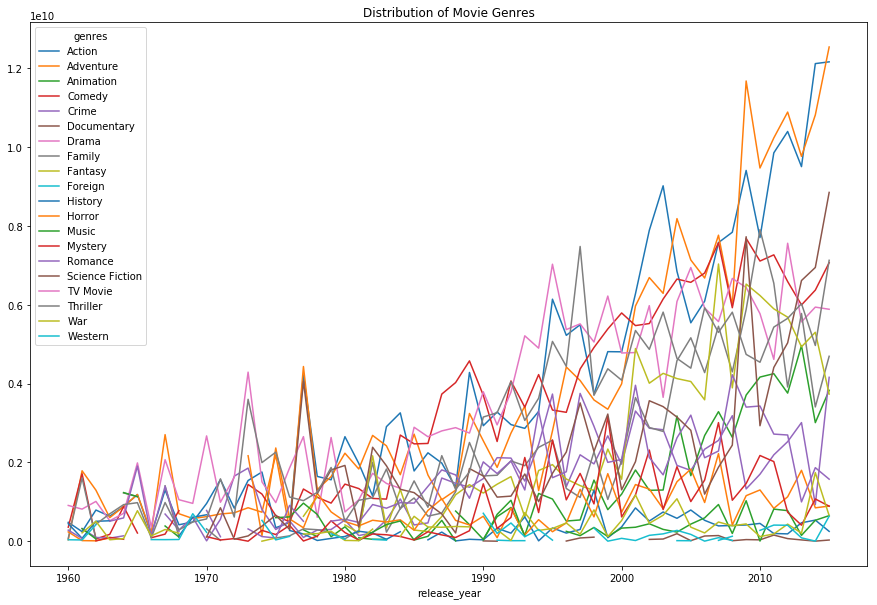

In [112]:
movies_clear.groupby(['genres','release_year'])['revenue_adj'].sum().unstack('genres').plot(figsize=(15,10), title='Distribution of Movie Genres')


由上图可知，Action和Adventure类型的电影票房收入每年都是比较高的两种类型，观众最为喜欢

In [113]:
movies_clear_genres_2 = movies_clear.query('genres == "Action" or genres == "Adventure"')

同样我们把这两种类型的电影单独拿出来

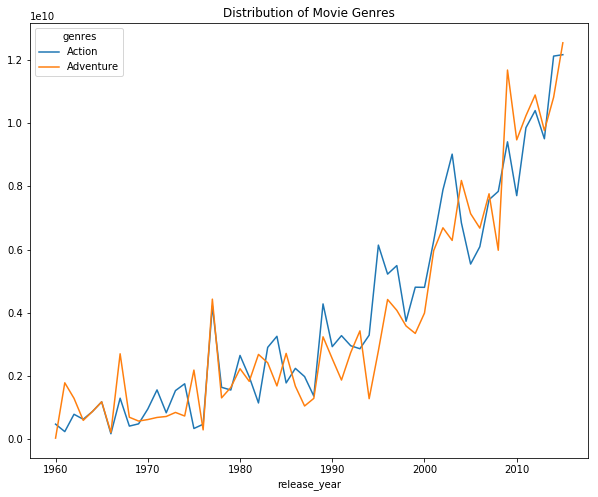

In [114]:
movies_clear_genres_2.groupby(['genres','release_year'])['revenue_adj'].sum().unstack('genres').plot(figsize=(10,8), title='Distribution of Movie Genres')

发展势头很是迅猛，说明观众对这两种类型的电影认可度极高，若电影公司拍这两种类型电影，因该还是有钱途的。

<a id='conclusions'></a>
## 结论

本次报告所研究的数据是经过清理后的数据，比如去重，去空之后的数据，但由于数据量够大，清理后的数据还有12664个样本，因此具有一定的参考作用。数据分析阶段分别从导演和观众两类群体的视角进行分析，当然还能从其他特征上分析，比如是否不经改编的原创小说最受导演青睐，哪家电影公司盈利最多，这家电影公司投资最大的电影类型是什么，等等。   
    
由上两个研究可推测导演比较喜欢拍Drama、Comedy和Thriller这三类电影，观众最喜欢的电影类型是Action和Adventure，这两种类型电影拍摄数量少，投资大，但是回报也高。 

报告中仅使用了Exploratory Data Analysis，只能得出相关关系，而不能得出因果关系，仅供参考。

In [115]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295